# Experimenting with different optimizers, network layouts, and activation functions

Drawing on the simple MNIST classifier from task 6.2, evaluate different optimizers, network layouts, and activation functions.  
To this end, first learn how to visualize the training history of a Keras model:
* [Using the `History` of a training](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras) (not detailed enough)
* [Visualizing loss and metrics during training](https://www.tensorflow.org/guide/keras/train_and_evaluate#visualizing_loss_and_metrics_during_training)
* [Using the `TensorBoard` callback in Keras](https://www.tensorflow.org/tensorboard/scalars_and_keras)

To see the detailed evolution of errors, you should consider a resolution as fine-grained as your mini-batches.

## Task 7.1

Consider the simple network below (with a single hidden layer of 64 neurons) and compare the learning curves of networks with ReLu, logistic and tanh activations.
What happens if you use different activation functions also in the output layer?

## Task 7.2

Going back to the original ReLu-based network, compare [various optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers), i.e. SGD, RMSProp, Adam, ...
How does their performance differ?

## Task 7.3

Compare various network layouts:
* Try to adapt the number of hidden neurons, e.g. 32, 64, 128.
* Try to add more hidden layers.
* What is the best performance you can achieve (neglecting all regularization approaches for now)?

In [7]:
from tensorflow import keras

# Load MNIST data set
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
# Neural Network with a single hidden layer
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10))

model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['sparse_categorical_accuracy'])

history = model.fit(x_train, y_train, batch_size=100, epochs=3,
                    validation_data=(x_val, y_val))

# Task 7.1
---

Consider the simple network below (with a single hidden layer of 64 neurons) and compare the learning curves of networks with ReLu, logistic and tanh activations.

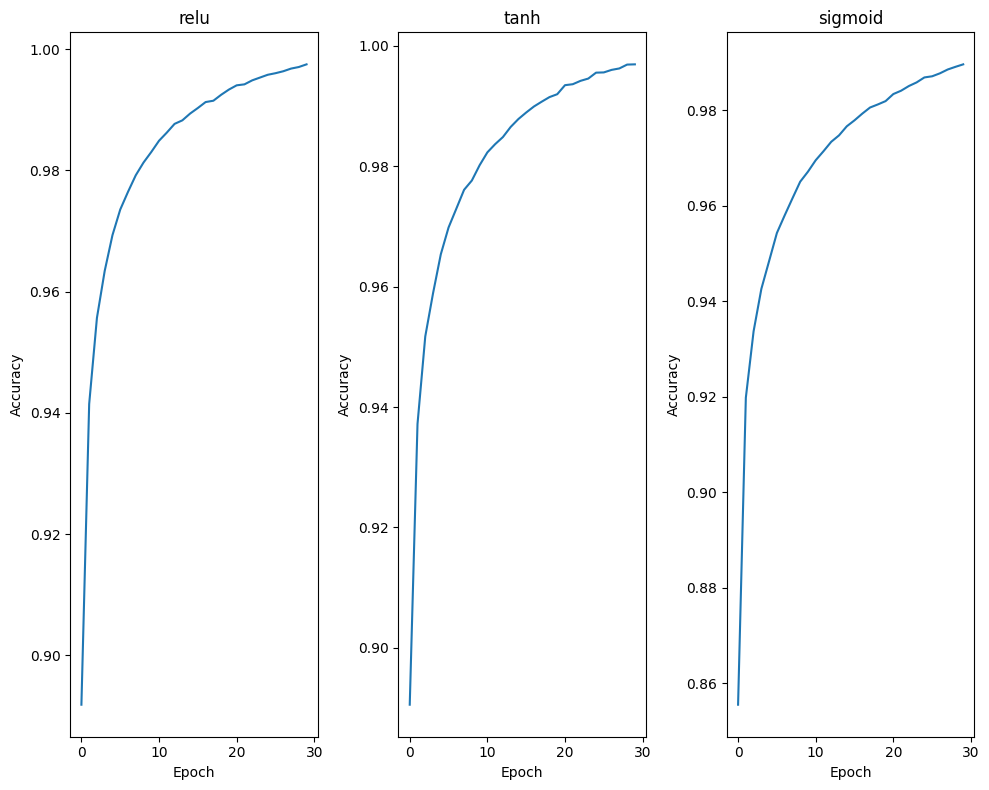

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K

fig, axs = plt.subplots(1, 3, figsize=(10, 8))

activation_functions = ["relu", "tanh", "sigmoid"]
counter = 0

for i in activation_functions:
    model = models.Sequential()
    model.add(layers.Dense(64, activation=i, input_shape=(28 * 28,)))
    model.add(layers.Dense(10))
    model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['sparse_categorical_accuracy'])
    history = model.fit(x_train, y_train, batch_size=100, epochs=30, validation_data=(x_val, y_val), verbose=0)
    
    axs[counter].plot(history.history['sparse_categorical_accuracy'])
    axs[counter].set_title(i)
    axs[counter].set_xlabel('Epoch')
    axs[counter].set_ylabel('Accuracy')
    counter += 1

fig.tight_layout()
plt.show()


What happens if you use different activation functions also in the output layer?

/Users/dennisschielke/Library/Python/3.9/lib/python/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


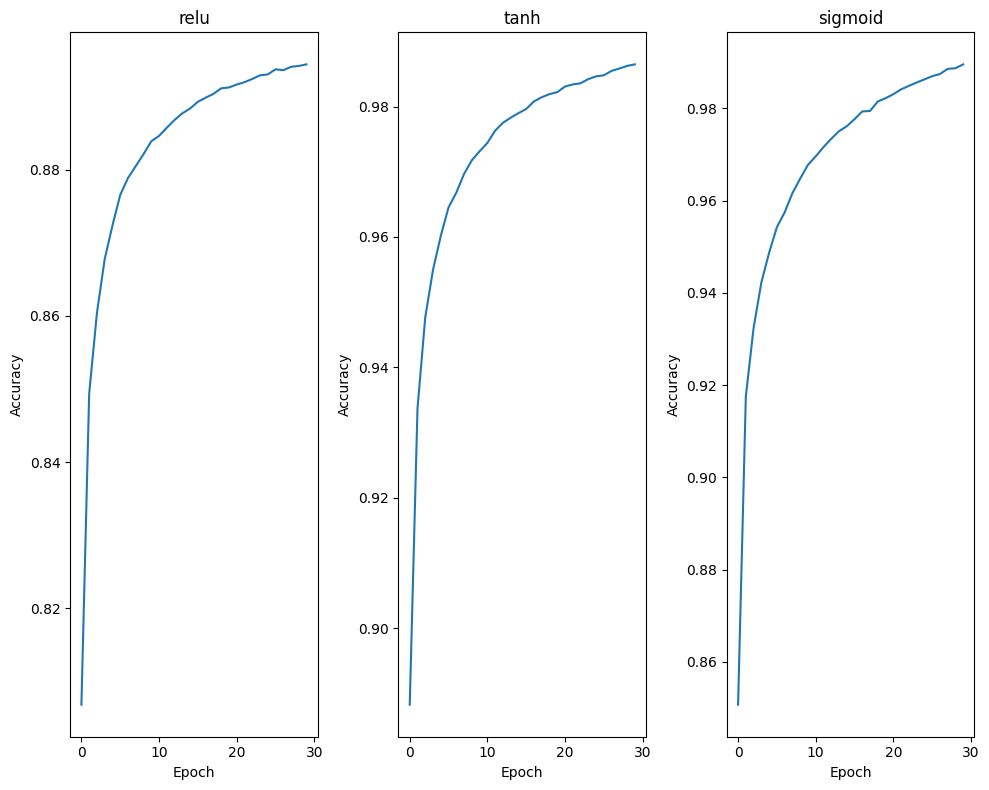

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(10, 8))

activation_functions = ["relu", "tanh", "sigmoid"]
counter = 0

for i in activation_functions:
    model = models.Sequential()
    model.add(layers.Dense(64, activation=i, input_shape=(28 * 28,)))
    model.add(layers.Dense(10, activation=i))
    model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['sparse_categorical_accuracy'])
    history = model.fit(x_train, y_train, batch_size=100, epochs=30, validation_data=(x_val, y_val), verbose=0)
    
    axs[counter].plot(history.history['sparse_categorical_accuracy'])
    axs[counter].set_title(i)
    axs[counter].set_xlabel('Epoch')
    axs[counter].set_ylabel('Accuracy')
    counter += 1

fig.tight_layout()
plt.show()

Nothing much changes. The accuracy is a bit lower than the one without the output activation but that is it.

# Task 7.2
---

In [42]:
optimizer_names = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']

In [44]:
for i, optimizer_name in enumerate(optimizer_names): 
    model = models.Sequential()
    optimizer = keras.optimizers.get(optimizer_name)
    model.add(layers.Dense(64, activation="sigmoid", input_shape=(28 * 28,)))
    model.add(layers.Dense(10))
    model.compile(optimizer=optimizer,loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['sparse_categorical_accuracy'])
    history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_val, y_val), verbose=0)
    print(f"The Optimizer: {str(optimizer_name)} has the Accuracy: {history.history['sparse_categorical_accuracy'][-1:]}")
    

The Optimizer: SGD has the Accuracy: [0.8709200024604797]
The Optimizer: RMSprop has the Accuracy: [0.9666200280189514]
The Optimizer: Adam has the Accuracy: [0.9674800038337708]
The Optimizer: Adadelta has the Accuracy: [0.28790000081062317]
The Optimizer: Adagrad has the Accuracy: [0.7888000011444092]
The Optimizer: Adamax has the Accuracy: [0.9407200217247009]
The Optimizer: Nadam has the Accuracy: [0.9668200016021729]
The Optimizer: Ftrl has the Accuracy: [0.11355999857187271]


    The Optimizer: SGD has the Accuracy: [0.8709200024604797]
    The Optimizer: RMSprop has the Accuracy: [0.9666200280189514]
    The Optimizer: Adam has the Accuracy: [0.9674800038337708]
    The Optimizer: Adadelta has the Accuracy: [0.28790000081062317]
    The Optimizer: Adagrad has the Accuracy: [0.7888000011444092]
    The Optimizer: Adamax has the Accuracy: [0.9407200217247009]
    The Optimizer: Nadam has the Accuracy: [0.9668200016021729]
    The Optimizer: Ftrl has the Accuracy: [0.11355999857187271]

The performance differs tremendously. Some perform really well others completly fail.

# Task 7.3
---

In [46]:
activation_functions = ["relu", "tanh", "sigmoid"]
counter = 0
hiddenlayer = True
neurons = [18, 32, 64, 128]

for i in neurons:
    model = models.Sequential()
    model.add(layers.Dense(i, activation="relu", input_shape=(28 * 28,)))
    if hiddenlayer == True:
        model.add(layers.Dense(20))
    model.add(layers.Dense(10))
    model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['sparse_categorical_accuracy'])
    history = model.fit(x_train, y_train, batch_size=100, epochs=30, validation_data=(x_val, y_val), verbose=0)
    print(f"The accuracy for {i} neurons is: {history.history['sparse_categorical_accuracy'][-1:]}")


The accuracy for 18 neurons is: [0.9703999757766724]


The accuracy for 32 neurons is: [0.9883599877357483]


The accuracy for 64 neurons is: [0.9982799887657166]
The accuracy for 128 neurons is: [0.9995999932289124]


Compare various network layouts:
* Try to adapt the number of hidden neurons, e.g. 32, 64, 128.
* Try to add more hidden layers.
* What is the best performance you can achieve (neglecting all regularization approaches for now)?

The when trying to adapt a different number of hidden neurons and adding 1 more hidden layer with 20 neurons here are the results: 

    The accuracy for 18 neurons is: [0.9703999757766724]
    The accuracy for 32 neurons is: [0.9883599877357483]
    The accuracy for 64 neurons is: [0.9982799887657166]
    The accuracy for 128 neurons is: [0.9995999932289124]
 
The higher the amount of neurons, the higher the accuracy. The accuracy is actually converges against 1 which is insane but probably an overfit on the data set. Adding more layers can be good but could also falsen your test results since they might over interpretate the train dataset. It all depends on the current case that is being handled.